# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 1) Qual a base escolhida?

*Indique a base escolhida.*

base escolhida: Forest covertypes

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from sklearn import model_selection
from sklearn.datasets import fetch_covtype
from sklearn.utils import check_array
from sklearn import svm
import seaborn as sns


print("Loading dataset...")
data=pd.read_csv('/content/drive/My Drive/covtype.csv')

# dividir a base em treino e teste 
# X_train, X_test, y_train, y_test = model_selection.train_test_split(covtype_db.data, covtype_db.target, test_size=0.3, random_state=0)

# # X_train.shape, y_train.shape

# # X_test.shape, y_test.shape

# clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

# clf.score(X_test, y_test)     
# # X = check_array(data['data'], dtype=np.float32, order='C')
# # y = (data['target'] != 1).astype(np.int)

Loading dataset...


In [55]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [56]:
print('Nomes das Features')
print(data.columns)

Nomes das Features
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Ty

In [0]:
#Verificando valores ausentes e nulos
print (data.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

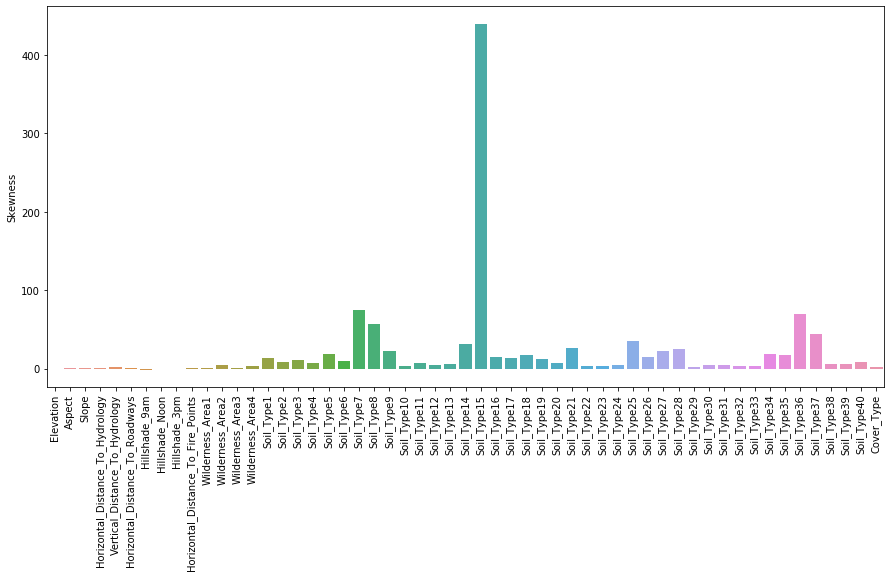

In [57]:
# verificando assimetria  para eventuais correções
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

Cover_Type
1    36.460521
2    48.759922
3     6.153746
4     0.472796
5     1.633873
6     2.989095
7     3.530048
dtype: float64

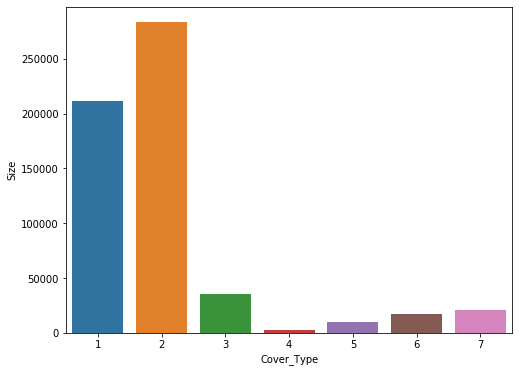

In [58]:
# avaliando as distribuições das classes classes
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

#avaliando o percentual de distribuição das classes
data.groupby('Cover_Type').size()/ data.shape[0] * 100


### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*`RandomForest `*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

In [59]:
# separando os dados em X e Y
X=data.loc[:,'Elevation':'Soil_Type40']
y=data['Cover_Type']

from sklearn.model_selection import train_test_split

#Separando os dados em 30% para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# implementando DecisionTree
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986,criterion='gini',max_depth=3)
classifier_dt.fit(X_train, y_train)

classifier_dt.predict (X_test)

from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, X, y,  scoring='accuracy', cv=5)

print(scores_dt.mean())


0.6433083090176746


#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

In [73]:
# importando blibliotecas de normalização
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

#  copiando os dados para nova variavel 

new_data = data
new_data =  data.set_index('Cover_Type') 

# desprezando algumas features por relevância.
new_data.drop(columns=['Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type15','Soil_Type36','Soil_Type37'], inplace=True)

df_norm1 = (new_data - new_data.mean()) / (new_data.max() - new_data.min())
new_data = df_norm1

X=new_data.loc[:,'Elevation':'Soil_Type40']
y=data['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# implementando DecisionTreeClassifier
classifier_dt =  DecisionTreeClassifier(random_state=1986,criterion='gini',max_depth=3)
classifier_dt.fit(X_train, y_train)

classifier_dt.predict (X_test)

scores_dt = cross_val_score(classifier_dt, X, y,  scoring='accuracy', cv=3 )

print(scores_dt.mean())



Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
       'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
       'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29',
       'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33',
       'Soil_Type34', 'Soil_Type35', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40'],
      dtype='object')
0.6409556622126419




#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

In [0]:
# tuning

# alterando hiper-parametro para verificar melhorias dos resultados.  
# alterando criterion (entropy), max_depth, splitter
# sensivel melhora ao usar o persort como True
classifier_dt = DecisionTreeClassifier(random_state=1986,criterion='entropy',max_depth=5, splitter='random',min_samples_leaf=1,min_weight_fraction_leaf=0,presort=True)
classifier_dt.fit(X_train, y_train)

classifier_dt.predict (X_test)

scores_dt = cross_val_score(classifier_dt, X, y,  scoring='accuracy', cv=5)

# 0.6433083090176746
# 0.6445217708787441 max_depth 3 -> 5 
# 0.6628243175229495 splitter para random
# 0.6645403016564041

print(scores_dt.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

0.6645403016564041


#### 3.5) Qual método escolhido?

Indique o método escolhido

RandomTree

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação da Random Forest

In [74]:
# separando os dados em X e Y
X=data.loc[:,'Elevation':'Soil_Type40']
y=data['Cover_Type']

from sklearn.model_selection import train_test_split

#Separando os dados em 30% para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# implementando DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

clf.predict(X_test)

from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(clf, X, y,  scoring='accuracy', cv=5)

print(scores_dt.mean())

0.9359999999999999


#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

In [110]:
# importando blibliotecas de normalização
from sklearn.preprocessing import minmax_scale
from sklearn import preprocessing

#  copiando os dados para nova variavel 

new_data2 = data
new_data2 =  data.set_index('Cover_Type') 

# desprezando algumas features por relevância.
new_data2.drop(columns=['Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type15','Soil_Type36','Soil_Type37'], inplace=True)

# normalização dos dados em ponderamento de médias
df_norm1 = (new_data2 - new_data2.mean()) / (new_data2.max() - new_data2.min())
new_data2 = df_norm1

X=new_data2.loc[:,'Elevation':'Soil_Type40']
y=data['Cover_Type']

# redução de dimensionalidade com StandardScaler 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#  processamento e redução de escala de variancia.
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train_minmax, y_train)

clf.predict(X_test)

scores_dt = cross_val_score(clf, X, y,  scoring='accuracy', cv=5)

print(scores_dt.mean())

0.9359999999999999


#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

In [109]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=7, random_state=0,n_estimators=100,criterion= 'gini',min_samples_split=2  ) 

clf.fit(X_train_minmax, y_train)

clf.predict(X_test)

scores_dt = cross_val_score(clf, X, y,  scoring='accuracy', cv=5)

print(scores_dt.mean())

0.9480000000000001


### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

Os resultados obtidos foram completamente diferentes. O classificador DeciscionTree teve uma acuracia de 0.66 contra  0.94 da RandomForest. Baseado somente na acuracia e escolheria levar para a produção o Classificador RandomForest. Acredito que devido as varias classes da base, e das 54 features precisarem de algo mais parrudo do que decision tree para ter um melhor desempenho.

Os Riscos que enxego são do modelo de RandomForest apesar de ter melhor acuracia, isso possa corroborar por esconder coisas como precisão no treino.  Sendo assim precisariamos implementar alguns passos extras de comparativos e tratativa Feature Engineer para garantir que  isso não ocorra.